# Week 10 - PCA and Dimension Reduction Homework
Execute the below code and answer the following questions. __Do NOT commit the csv file!__

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification

def generate_data():
    x, y = make_classification(n_samples=1500, 
                            n_features = 20,
                            n_informative = 8,
                            n_redundant = 5,
                            n_repeated = 1, 
                            n_classes = 3,
                            weights = (0.5, 0.25, 0.25),
                            random_state = 120
                            )
    colNames = ['var'+str(x) for x in range(20)]
    colNames.append('target')

    df = pd.DataFrame(np.concatenate((x,y.reshape(-1,1)), axis=1), columns=colNames)
    df.to_csv('pca-dataset.csv', index=False)
    
generate_data()

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

df = pd.read_csv('pca-dataset.csv')
df.head()

,var0,var1,var2,var3,var4,var5,var6,var7,var8,var9,...,var11,var12,var13,var14,var15,var16,var17,var18,var19,target
0,-2.882513,-3.272465,-2.520732,-1.987174,-2.073689,-3.272465,-1.237969,1.690547,-0.211314,-5.753190,...,-0.574979,-1.916275,-5.994075,-3.349615,-0.846193,2.491347,1.360958,-2.892522,-1.377561,0.0
1,0.775242,-1.015994,0.005137,0.057274,0.590205,-1.015994,1.350954,-1.493037,-0.862391,-1.986047,...,0.523760,0.399579,0.088600,0.718606,-1.112030,0.083929,0.606544,-1.376793,1.302641,2.0
2,-0.876376,0.220453,3.114224,-1.640025,1.180348,0.220453,0.465102,0.222511,0.880455,2.922315,...,-0.370516,3.585262,-2.168162,2.693429,-0.966636,1.586302,-2.821546,0.482164,0.187404,0.0
3,-2.550342,-1.968144,0.077681,-1.887719,1.864445,-1.968144,-0.527958,-0.201467,-0.532649,2.287445,...,-0.041341,2.383582,-0.417253,1.305379,-0.435123,-0.468557,0.923290,3.880050,2.676798,1.0
4,-0.454974,1.293300,0.112201,-0.589989,-1.674321,1.293300,0.487302,1.776318,0.702520,-1.024127,...,-0.452869,-0.667306,0.345364,-3.920591,-0.438296,-1.690141,0.176906,1.920142,1.474634,0.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var0    1500 non-null   float64
 1   var1    1500 non-null   float64
 2   var2    1500 non-null   float64
 3   var3    1500 non-null   float64
 4   var4    1500 non-null   float64
 5   var5    1500 non-null   float64
 6   var6    1500 non-null   float64
 7   var7    1500 non-null   float64
 8   var8    1500 non-null   float64
 9   var9    1500 non-null   float64
 10  var10   1500 non-null   float64
 11  var11   1500 non-null   float64
 12  var12   1500 non-null   float64
 13  var13   1500 non-null   float64
 14  var14   1500 non-null   float64
 15  var15   1500 non-null   float64
 16  var16   1500 non-null   float64
 17  var17   1500 non-null   float64
 18  var18   1500 non-null   float64
 19  var19   1500 non-null   float64
 20  target  1500 non-null   float64
dtypes: float64(21)
memory usage: 246.2 KB

In [39]:
from sklearn.model_selection import train_test_split

X = df[[x for x in df.columns if x.startswith('var')]]
y = df['target']

X_train, X_test, y_training, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

print('\nFeatures:')
print(*X_train, sep='\t')

Training samples: 1,200
Test samples: 300

Features:
var0	var1	var2	var3	var4	var5	var6	var7	var8	var9	var10	var11	var12	var13	var14	var15	var16	var17	var18	var19


### Data Description
- `var1 - var19`: a feature for the data.  
- `target`: variable we wish to be able to predict, which is 1 of 3 classes.

## EDA

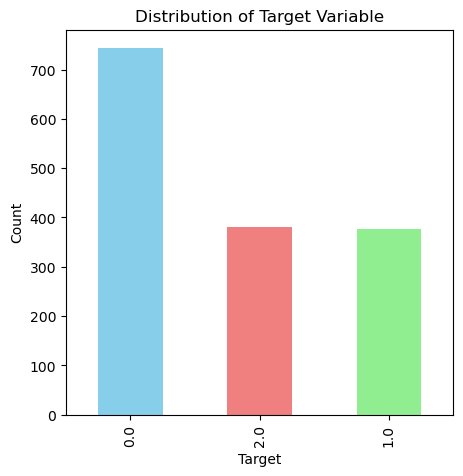

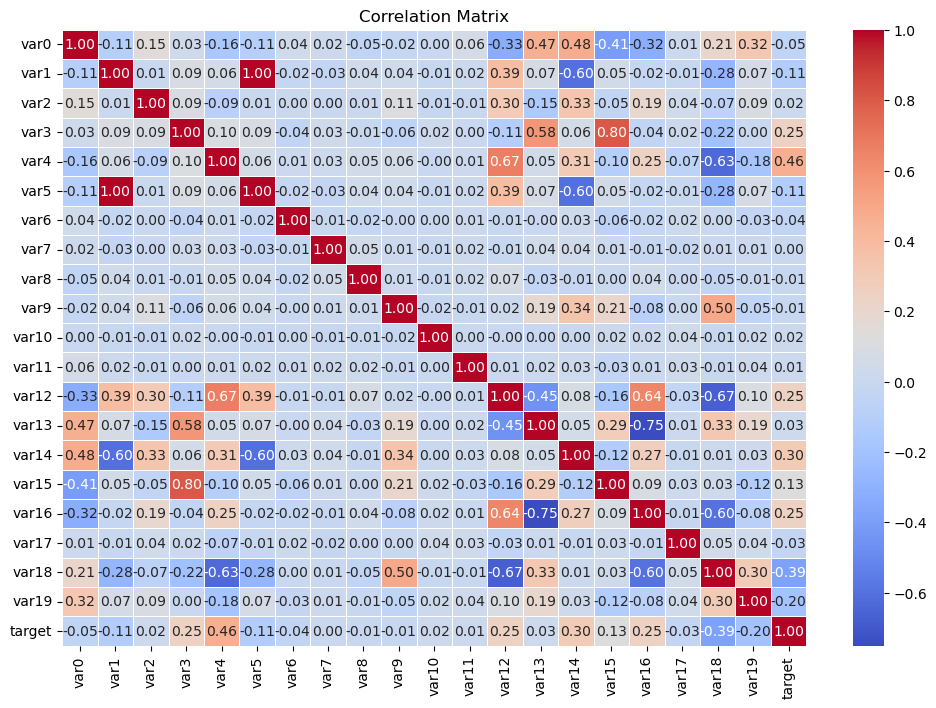

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Distribution of the Target Variable...
plt.figure(figsize=(5, 5))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

# Correlation matrix....
plt.figure(figsize=(12, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Question 1
- Use principle components analysis to determine the number of components to reduce the data to by evaluating the explained variance ratio (use `X_train`).  
- Remember to scale the data first.  
- What number of components would you recommend based on your analysis?  
- Explain your results using markdown cells.

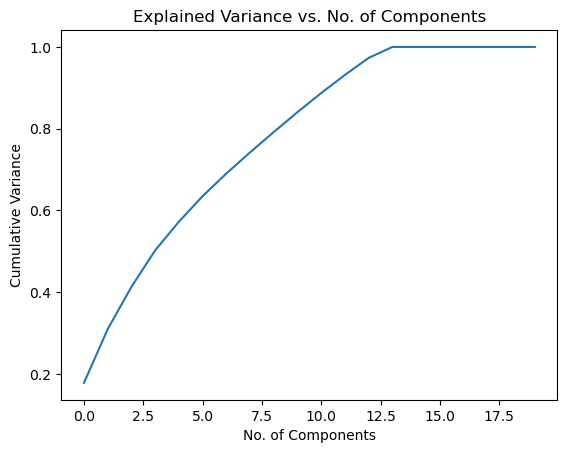

In [41]:
# insert code here

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# here i standardize the data fro the model....
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)


# here i apply PCA....
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)


# here i plot the explained variance ratio from the model....
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Cumulative Variance')
plt.title('Explained Variance vs. No. of Components')
plt.show()


> Describe your results here

- Here the plot shows the cumulative variance as the no. of components increases. The plot shows us the number of components that have capture a sufficient amounbt of variance. And all of this indicates that additional components contribute less to the overall variance.

<Insert comments>

# Question 2
- Evaluate the target variable in the `df` object.  
- Which metric would you use in evaluating a predictive model. Explain your choice in the markdown cell. 

In [42]:
# Insert code here

df['target'].value_counts()


0.0    744
2.0    380
1.0    376
Name: target, dtype: int64

> Describe your results here

- here i examine the distribution of thr target variable from the classes. here i choose an appropriate metric based on the class distribution as for this imbalanced datasets, metrics like precision, recall, or F1 score are often more informative than accuracy.

# Question 3
- Without using PCA, create a logistic regression model using practices discussed in class.  
- Which model would you choose? Explain your results in the markdown cells.    
- What is the accuracy, precision, and recall for the test data?  

In [43]:
# Insert code here

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score

# logistic regression model....
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train, y_training)

# Prediction....
y_pred = logreg.predict(X_test)

# Metrics calculation....
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')


accuracy

0.7033333333333334

In [44]:
precision

0.7040254342431762

In [45]:
recall

0.7033333333333334

> Describe results here

- here is the evaluation of/ the logistic regression model's performance using accuracy, precision, and recall on the test data.

# Question 4
- Use PCA within a pipeline to create a logistic regression model using best practices from class.  
- Which model performs the best on the training data? Explain your results in markdown cells.  
- What is the accuracy, precision, and recall for the test data?
- Does this perform better than the original logistic regression model?

In [61]:
# Insert code

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV


# pipeline with PCA and logistic regression.....
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('logreg', LogisticRegression(random_state=42))
])


# parameters for GridSearchCV....
param_grid = {
    'pca__n_components': [5, 10, 15], 
    'logreg__C': [0.1, 1, 10]
}


# Grid search....

grid_s = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_s.fit(X_train, y_training)


# best parameters....

best_params = grid_search.best_params_


# Prediction....

y_pred_pca = grid_search.predict(X_test)


# Calculation of metrics....

accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca, average='weighted')
recall_pca = recall_score(y_test, y_pred_pca, average='weighted')


best_params 


{'logreg__C': 10, 'pca__n_components': 15}

In [62]:
precision_pca

0.7040254342431762

In [63]:
accuracy_pca

0.7033333333333334

In [64]:
recall_pca

0.7033333333333334

> Describe your results here

- here i compare the performance of the PCA-based logistic regression model with the original logistic regression model.

# Question 5

- Without using PCA, create a decision tree model using best practices discussed in class.  
- Which model performs the best on the training data? Explain your results in the markdown cells.  
- What is the accuracy, precision, and recall for the test data?  
- Does this perform better than either of the logistic regression models?

In [50]:
# Insert code here

from sklearn.tree import DecisionTreeClassifier


# decision tree model....
dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train, y_training)


# Prediction.....
y_pred_dt = dt_model.predict(X_test)


# Calculation of metrics...
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')


accuracy_dt,


(0.66,)

In [51]:
 precision_dt,

(0.6798572683355292,)

In [52]:
 recall_dt

0.66

> Describe your results here

- here is the evaluation of the decision tree model's performance using accuracy, precision, and recall on the test data.



# Question 6
- Repeat `Question 5` but use PCA.  
- Does this perform better than the original Decision Tree or the logistic regression models?

In [53]:
# Insert code here


# here is the pipeline with PCA and decision tree....
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('dt', DecisionTreeClassifier(random_state=123))
])


# here are the parameters for GridSearchCV....
param_g_dt = {
    'pca__n_components': [5, 10, 15],  
    'dt__max_depth': [None, 5, 10]
}


# Grid search....
grid_s_dt = GridSearchCV(pipeline_dt, param_g_dt, cv=5, scoring='accuracy')
grid_s_dt.fit(X_train, y_training)



# Best parameters...
best_p_dt = grid_s_dt.best_params_

# Predict on the test set
y_pred_pca_dt = grid_s_dt.predict(X_test)

# Calculation of metrics
accuracy_pca_dt = accuracy_score(y_test, y_pred_pca_dt)
precision_pca_dt = precision_score(y_test, y_pred_pca_dt, average='weighted')
recall_pca_dt = recall_score(y_test, y_pred_pca_dt, average='weighted')


best_params_dt  


{'dt__max_depth': 5, 'pca__n_components': 15}

In [54]:
accuracy_pca_dt

0.7466666666666667

In [55]:
precision_pca_dt

0.7493726035868893

In [56]:
recall_pca_dt

0.7466666666666667

> Describe results here

- here is the comparsion of the performance of the PCA-based decision tree model with the original decision tree model and logistic regression models....